# General Types of Chatbots

Chatbots can be categorized based on their functionality, intelligence, and interaction style. Here are the main types, along with context for your students:

---

## 1. Rule-Based Chatbots

**Description:** Use predefined rules and patterns (e.g., keyword matching or decision trees) to respond.  
**Example:** A chatbot that replies “Book now!” if the user types “book a flight.”  
**Pros:** Simple, predictable, easy to implement.  
**Cons:** Limited flexibility, struggles with varied inputs.  


---

## 2. ML-Driven Chatbots

**Description:** Use machine learning to understand and classify user input, such as intent detection or sentiment analysis.  
**Example:** A customer service bot that classifies queries as “refund” or “support” using logistic regression.  
**Pros:** Handles diverse inputs better than rule-based systems.  
**Cons:** Requires labeled training data and preprocessing.  

---

## 3. Generative Chatbots

**Description:** Use generative AI (e.g., GPT or BERT) to create dynamic, context-aware responses.  
**Example:** ChatGPT, which generates human-like replies without predefined responses.  
**Pros:** Highly conversational, adaptable to varied inputs.  
**Cons:** Complex, resource-intensive, and requires advanced NLP models.  


---

## 4. Hybrid Chatbots

**Description:** Combine rule-based and ML/generative approaches for greater flexibility and reliability.  
**Example:** A bot that uses ML to classify intents and falls back to rules for specific commands.  
**Pros:** Balances simplicity and sophistication.  
**Cons:** More complex to design and maintain.  


---

## 5. Task-Oriented Chatbots

**Description:** Focus on completing specific tasks like booking, scheduling, or support.  
**Example:** A flight booking bot that walks users through the booking steps.  
**Pros:** Efficient and effective in narrow domains.  
**Cons:** Limited to the tasks they’re designed for.  


---

## 6. Conversational or Virtual Assistant Chatbots

**Description:** Designed for general conversation and assistance, often with personality (e.g., Siri, Alexa).  
**Example:** A bot answering weather questions, greetings, or general FAQs.  
**Pros:** Engaging and widely applicable.  
**Cons:** Requires broad intent recognition and strong NLP capabilities.  


### Summary of Types (for quick reference)

| Type                    | Core Idea                                      |
|-------------------------|------------------------------------------------|
| Rule-Based              | If-then logic, keyword patterns                |
| ML-Driven               | Learns from labeled data                       |
| Generative              | Creates replies (no fixed responses)           |
| Hybrid                  | Combines rule-based + ML/generative            |
| Task-Oriented           | Focuses on completing a specific task          |
| Conversational Assistant| Engages in open-ended conversation             |



In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# nlp
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
import string

nltk.download('stopwords')
nltk.download('punkt')


import difflib
import random

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [239]:
df = pd.read_excel('icthub_dataset.xlsx')
df.head()

,User Input,Category,Chatbot Response
0,Good morning,Greeting,Welcome to ICTHUB - For Digital Solutions! \n\...
1,Good afternoon,Greeting,Welcome to ICTHUB - For Digital Solutions! \n\...
2,Good evening,Greeting,Welcome to ICTHUB - For Digital Solutions! \n...
3,Hi there,Greeting,\n Welcome to ICTHUB - For Digital Solutions!...
4,Hello,Greeting,\n Welcome to ICTHUB - For Digital Solutions!...


In [240]:
df['Category'].value_counts()

Category
Asking for Internship Details         82
Thanking Message                      69
General_Info_Services                 68
AI Internship Details                 66
Cyber Security Internship Details     64
Web Development internship details    64
data analysis internship details      64
flutter internship details            64
supply chain internship details       64
Greeting                              60
Location                              50
Name: count, dtype: int64

In [241]:
len(df['Category'].value_counts())

11

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User Input        715 non-null    object
 1   Category          715 non-null    object
 2   Chatbot Response  715 non-null    object
dtypes: object(3)
memory usage: 16.9+ KB


In [243]:
df.isnull().sum()

User Input          0
Category            0
Chatbot Response    0
dtype: int64

In [244]:
df.duplicated().sum()

2

In [245]:
df.drop_duplicates(inplace=True)

# Preprocessing

In [246]:
def preprocessing(text):

  text = text.lower()

  text = word_tokenize(text)

  # remove special characters
  filtered_text =[]
  for word in text:
    if word.isalnum():
      filtered_text.append(word)

  text = filtered_text[:]
  filtered_text.clear()

  # remove stopwords and punctuation
  for word in text:
    if word not in stopwords.words('english') and word not in string.punctuation:
      filtered_text.append(word)

  text = filtered_text[:]
  filtered_text.clear()

  # stemming
  ps = PorterStemmer()
  for word in text:
    filtered_text.append(ps.stem(word))
  text = filtered_text[:]
  filtered_text.clear()

  return " ".join(text)

In [247]:
df['Preprocessed'] = df['User Input'].apply(preprocessing)
df.head()

,User Input,Category,Chatbot Response,Preprocessed
0,Good morning,Greeting,Welcome to ICTHUB - For Digital Solutions! \n\...,good morn
1,Good afternoon,Greeting,Welcome to ICTHUB - For Digital Solutions! \n\...,good afternoon
2,Good evening,Greeting,Welcome to ICTHUB - For Digital Solutions! \n...,good even
3,Hi there,Greeting,\n Welcome to ICTHUB - For Digital Solutions!...,hi
4,Hello,Greeting,\n Welcome to ICTHUB - For Digital Solutions!...,hello


In [248]:
X = df['Preprocessed']
y = df['Category']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # Spam = > 0 , Ham =>1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

# vectorization using tf idf
tfid_vec = TfidfVectorizer()
X_train = tfid_vec.fit_transform(X_train)
X_test = tfid_vec.transform(X_test)

In [249]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [250]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy_score : ",acc*100)

accuracy_score :  97.20670391061452


In [251]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 19,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 11,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0, 15,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16]], dtype=int64)

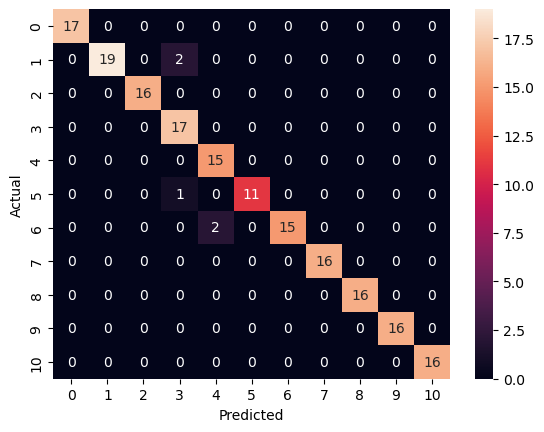

In [252]:
# show confustion matrix
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Chatbot GUI using gradio

In [253]:
known_words = list(tfid_vec.vocabulary_.keys()) # hi,hi,flkdsgjk

def is_similar_to_known_words(user_input,min_matches=1) : # True o  Flas
  words = user_input.split()
  match_count =0
  for word in words:
    close =difflib.get_close_matches(word,known_words,n=1,cutoff=0.75)
    if close:
      match_count+=1
    return match_count>=min_matches # 0 >=1

In [254]:
import gradio as gr
import random
import tempfile
import os
from gtts import gTTS



   
# Dummy chatbot model for demonstration
def chatbot_response(user_input):
    user_input_processed = preprocessing(user_input)
    if not is_similar_to_known_words(user_input_processed):
        response_text = "Chatbot: Sorry, I didn't understand that."
    else:
        user_input_transformed = tfid_vec.transform([user_input_processed])
        predicted_category = model.predict(user_input_transformed)
        predicted_category = label_encoder.inverse_transform(predicted_category)[0]
        responses = df.groupby('Category')['Chatbot Response'].apply(list).to_dict()
        response_text = random.choice(responses[predicted_category]).strip()
        if len(response_text) == 0:
            response_text = "Chatbot: Sorry, I didn't understand that."
        else:
            response_text = "Chatbot: " + response_text

            
    # Generate audio from the response text
    with tempfile.NamedTemporaryFile(suffix=".mp3", delete=False) as temp_audio:
        tts = gTTS(text=response_text, lang='en')
        tts.save(temp_audio.name)
        audio_file = temp_audio.name

    return response_text, audio_file

# Custom CSS styling
custom_css = """
body {
    background: linear-gradient(to right, #0f2027, #203a43, #2c5364);
    color: white;
    font-family: 'Segoe UI', sans-serif;
}

h1 {
    text-align: center;
    color: #ffffff;
    margin-bottom: 10px;
}

#logo {
    display: block;
    margin-left: auto;
    margin-right: auto;
    width: 500px;
    border-radius: 10px;
    margin-bottom: 20px;
}

.gradio-container {
    padding: 20px !important;
    background-color: rgba(0, 0, 0, 0.3);
    border-radius: 16px;
}

textarea, input {
    background-color: #1f1f1f !important;
    color: white !important;
    border: 1px solid #444 !important;
    border-radius: 8px !important;
}

button {
    background-color: #4CAF50 !important;
    color: white !important;
    border: none !important;
    border-radius: 8px !important;
    padding: 10px 20px !important;
}

button:hover {
    background-color: #45a049 !important;
}
"""

# Gradio interface
with gr.Blocks(css=custom_css, title="ICTHub Audio Chatbot") as demo:
    gr.Markdown("<h1>ICTHub Chatbot with Voice</h1>")
    gr.Image("icthub_logo.png", elem_id="logo")

    with gr.Row():
        user_input = gr.Textbox(label="What do you want to ask?", placeholder="Type your question here...")
        output_text = gr.Textbox(label="Chatbot Response")

    output_audio = gr.Audio(label="Voice Response", interactive=False)

    with gr.Row():
        submit_btn = gr.Button("Submit")
        clear_btn = gr.Button("Clear")

    submit_btn.click(fn=chatbot_response, inputs=user_input, outputs=[output_text, output_audio])
    clear_btn.click(fn=lambda: ("", None), inputs=None, outputs=[user_input, output_text, output_audio])

# Launch
demo.launch(inbrowser=True)


* Running on local URL:  http://127.0.0.1:7882
* To create a public link, set `share=True` in `launch()`.


In [255]:
حقهىف)()

SyntaxError: unmatched ')' (3168136724.py, line 1)

In [ ]:
# Create Gradio interface with text input and both text and audio outputs
iface = gr.Interface(
    fn=chatbot_response,
    inputs="text",
    outputs=["text", "audio"],
    title="ICTHub Chatbot with Text-to-Speech",
    description="Type your message, and the chatbot will respond with text and audio. Type 'exit' to stop."
)

# Launch the interface
iface.launch()

* Running on local URL:  http://127.0.0.1:7881
* To create a public link, set `share=True` in `launch()`.
